In [1]:
#Attribute information [Source]:
#1. seismic: the result of shift seismic hazard assessment in the mine working obtained by the seismic method (a — lack of hazard, b — low hazard, c — high hazard, d — danger state);
#2. seismoacoustic: the result of shift seismic hazard assessment in the mine working obtained by the seismoacoustic method;
#3. shift: information about the type of a shift (W — coal-getting, N -preparation shift);
#4. genergy: seismic energy recorded within the previous shift by the most active geophone (GMax) out of
#geophones monitoring the longwall;
#5. gpuls: a number of pulses recorded within the previous shift by GMax;
#6. gdenergy: a deviation of energy recorded within the previous shift by GMax from average energy recorded during eight previous shifts;
#7. gdpuls: a deviation of a number of pulses recorded within the previous shift by GMax from the average number of pulses recorded during eight previous shifts;
#8. ghazard: the result of shift seismic hazard assessment in the mine working obtained by the seismoacoustic method based on registration coming to from GMax only;
#9. nbumps: the number of seismic bumps recorded within the previous shift;
#10. nbumps2: the number of seismic bumps (in energy range [1⁰²,1⁰³)) registered within the previous shift;
#11. nbumps3: the number of seismic bumps (in energy range [1⁰³,1⁰⁴)) registered within the previous shift;
#12. nbumps4: the number of seismic bumps (in energy range [1⁰⁴,1⁰⁵)) registered within the previous shift;
#13. nbumps5: the number of seismic bumps (in energy range [1⁰⁵,1⁰⁶)) registered within the last shift;
#14. nbumps6: the number of seismic bumps (in energy range [1⁰⁶,1⁰⁷)) registered within the previous shift;
#15. nbumps7: the number of seismic bumps (in energy range [1⁰⁷,1⁰⁸)) registered within the previous shift;
#16. nbumps89: the number of seismic bumps (in energy range [1⁰⁸,1⁰¹⁰)) registered within the previous shift;
#17. energy: the total energy of seismic bumps registered within the previous shift;
#18. maxenergy: the maximum energy of the seismic bumps registered within the previous shift;
#19. class: the decision attribute — ‘1’ means that high energy seismic bump occurred in the next shift (‘hazardous state’), ‘0’ means that no high energy seismic bumps occurred in the next shift (‘non-hazardous state’).#

In [10]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [11]:
df = pd.read_csv('seismic-bumps.csv')
df.dtypes

seismic           object
seismoacoustic    object
shift             object
genergy            int64
gpuls              int64
gdenergy           int64
gdpuls             int64
hazard            object
nbumps             int64
nbumps2            int64
nbumps3            int64
nbumps4            int64
nbumps5            int64
nbumps6            int64
nbumps7            int64
nbumps89           int64
energy             int64
maxenergy          int64
class              int64
dtype: object

In [3]:
df = df.convert_dtypes()
df.dtypes

seismic           string
seismoacoustic    string
shift             string
genergy            Int64
gpuls              Int64
gdenergy           Int64
gdpuls             Int64
hazard            string
nbumps             Int64
nbumps2            Int64
nbumps3            Int64
nbumps4            Int64
nbumps5            Int64
nbumps6            Int64
nbumps7            Int64
nbumps89           Int64
energy             Int64
maxenergy          Int64
class              Int64
dtype: object

In [5]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0


# CATEGORICAL VARIABLES DISTRIBUTION ANALYSIS

<AxesSubplot:title={'center':'seismic values'}>

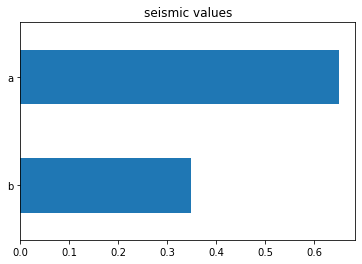

In [4]:
df['seismic'].value_counts(normalize=True, ascending=True).plot(kind='barh', title='seismic values')

<AxesSubplot:title={'center':'seismoacoustic values'}>

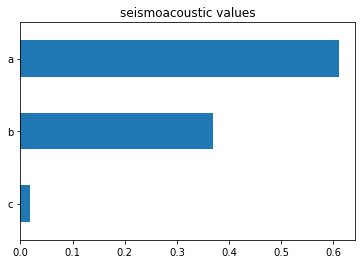

In [5]:
df['seismoacoustic'].value_counts(normalize=True, ascending=True).plot(kind='barh', title='seismoacoustic values')

<AxesSubplot:title={'center':'shift values'}>

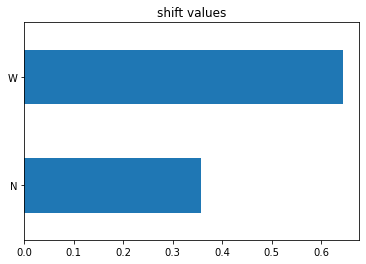

In [6]:
df['shift'].value_counts(normalize=True, ascending=True).plot(kind='barh', title='shift values')

<AxesSubplot:title={'center':'hazard values'}>

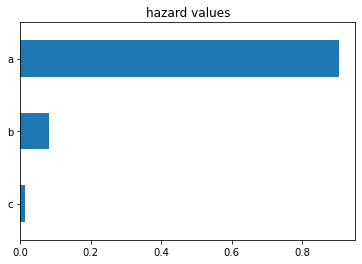

In [7]:
df['hazard'].value_counts(normalize=True, ascending=True).plot(kind='barh', title='hazard values')

##  NUMERICAL VARIABLES DISTRIBUTION ANALYSIS

<AxesSubplot:title={'center':'genergy values'}, ylabel='Density'>

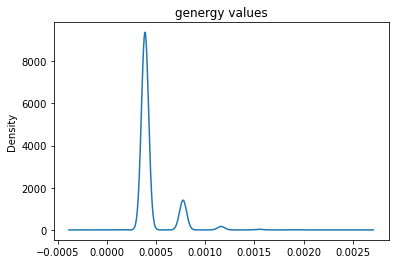

In [9]:
df['genergy'].value_counts(normalize=True).plot(kind='density', title='genergy values')

<AxesSubplot:title={'center':'gpuls values'}, ylabel='Density'>

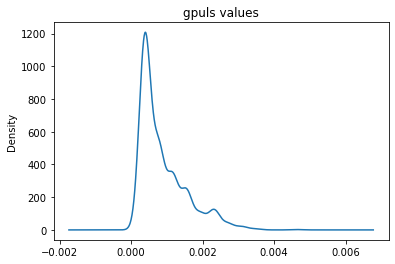

In [10]:
df['gpuls'].value_counts(normalize=True).plot(kind='density', title='gpuls values')

<AxesSubplot:title={'center':'gdpuls values'}, ylabel='Density'>

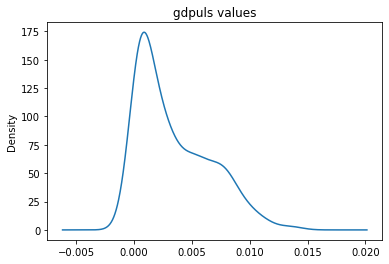

In [11]:
df['gdpuls'].value_counts(normalize=True).plot(kind='density', title='gdpuls values')

<AxesSubplot:title={'center':'energy values'}, ylabel='Density'>

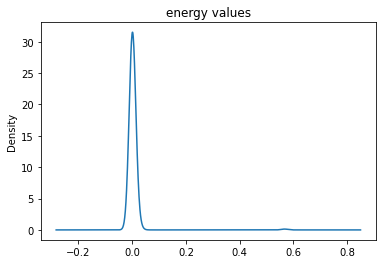

In [8]:
df['energy'].value_counts(normalize=True).plot(kind='density', title='energy values')

## DISCRETE VARIABLES DISTRIBUTION ANALYSIS

<AxesSubplot:title={'center':'nbumps values'}>

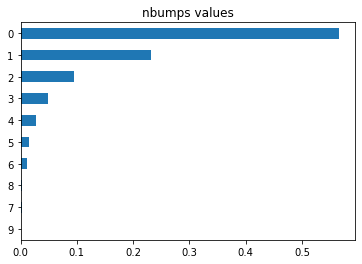

In [13]:
df['nbumps'].value_counts(normalize=True, ascending=True).plot(kind='barh', title='nbumps values')

<AxesSubplot:title={'center':'nbumps2 values'}>

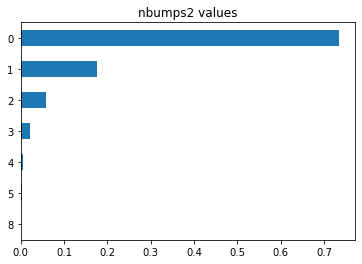

In [14]:
df['nbumps2'].value_counts(normalize=True, ascending=True).plot(kind='barh', title='nbumps2 values')

<AxesSubplot:title={'center':'nbumps3 values'}>

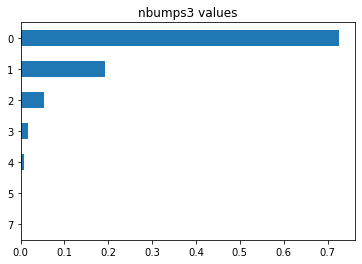

In [15]:
df['nbumps3'].value_counts(normalize=True, ascending=True).plot(kind='barh', title='nbumps3 values')

<AxesSubplot:title={'center':'nbumps4 values'}>

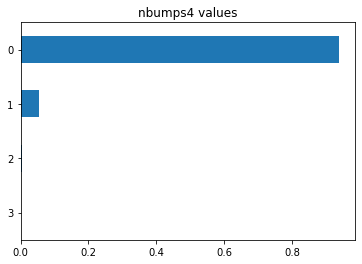

In [16]:
df['nbumps4'].value_counts(normalize=True, ascending=True).plot(kind='barh', title='nbumps4 values')

<AxesSubplot:title={'center':'nbumps5 values'}>

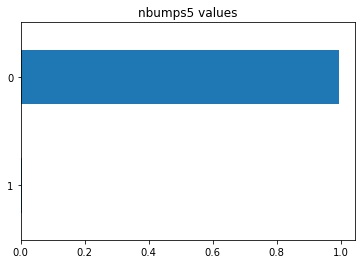

In [17]:
df['nbumps5'].value_counts(normalize=True, ascending=True).plot(kind='barh', title='nbumps5 values')

<AxesSubplot:title={'center':'nbumps6 values'}>

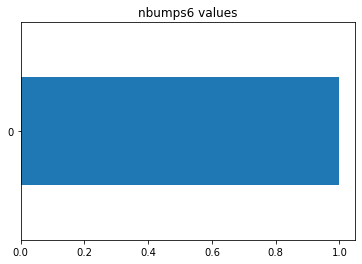

In [18]:
df['nbumps6'].value_counts(normalize=True, ascending=True).plot(kind='barh', title='nbumps6 values')

<AxesSubplot:title={'center':'nbumps7 values'}>

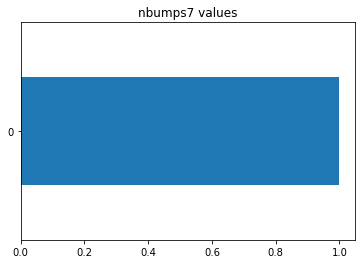

In [19]:
df['nbumps7'].value_counts(normalize=True, ascending=True).plot(kind='barh', title='nbumps7 values')

<AxesSubplot:title={'center':'nbumps89 values'}>

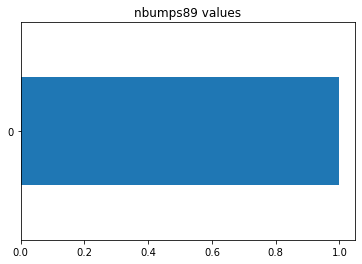

In [20]:
df['nbumps89'].value_counts(normalize=True, ascending=True).plot(kind='barh', title='nbumps89 values')

<AxesSubplot:title={'center':'class values'}>

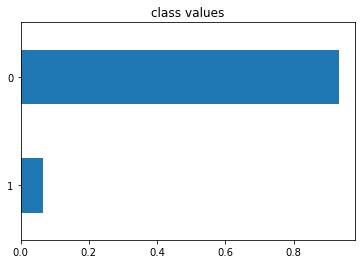

In [23]:
df['class'].value_counts(normalize=True, ascending=True).plot(kind='barh', title='class values')

In [24]:
df['class'].value_counts()  #in numero

0    2414
1     170
Name: class, dtype: Int64

In [25]:
df['seismic'] = df['seismic'].replace({'a':0, 'b':1, 'c':2, 'd':3}).astype(float)
df['seismoacoustic'] = df['seismoacoustic'].replace({'a':0, 'b':1, 'c':2}).astype(float)
df['shift'] = df['shift'].replace({'W':0, 'N':1}).astype(float)
df['genergy'] = df['genergy'].astype(float)
df['gpuls'] = df['gpuls'].astype(float)
df['gdenergy'] = df['gdenergy'].astype(float)
df['gdpuls'] = df['gdpuls'].astype(float)
df['hazard'] = df['hazard'].replace({'a':0, 'b':1, 'c':2}).astype(float)
df['nbumps'] = df['nbumps'].astype(float)
df['nbumps2'] = df['nbumps2'].astype(float)
df['nbumps3'] = df['nbumps3'].astype(float)
df['nbumps4'] = df['nbumps4'].astype(float)
df['nbumps5'] = df['nbumps5'].astype(float)
df['nbumps6'] = df['nbumps6'].astype(float)
df['nbumps7'] = df['nbumps7'].astype(float)
df['nbumps89'] = df['nbumps89'].astype(float)
df['energy'] = df['energy'].astype(float)
df['maxenergy'] = df['maxenergy'].astype(float)
df['class'] = df['class'].astype(float)

df.dtypes

seismic           float64
seismoacoustic    float64
shift             float64
genergy           float64
gpuls             float64
gdenergy          float64
gdpuls            float64
hazard            float64
nbumps            float64
nbumps2           float64
nbumps3           float64
nbumps4           float64
nbumps5           float64
nbumps6           float64
nbumps7           float64
nbumps89          float64
energy            float64
maxenergy         float64
class             float64
dtype: object

In [26]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,0.0,0.0,1.0,15180.0,48.0,-72.0,-72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,14720.0,33.0,-70.0,-79.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,0.0
2,0.0,0.0,1.0,8050.0,30.0,-81.0,-78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,28820.0,171.0,-23.0,40.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,0.0
4,0.0,0.0,1.0,12640.0,57.0,-63.0,-52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df.tail(6)

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
2578,1.0,0.0,0.0,28910.0,307.0,115.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2579,1.0,0.0,0.0,81410.0,785.0,432.0,151.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2580,1.0,0.0,0.0,42110.0,555.0,213.0,118.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2581,1.0,0.0,0.0,26960.0,540.0,101.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2582,0.0,0.0,0.0,16130.0,322.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2583,0.0,0.0,0.0,12750.0,235.0,-10.0,-10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   seismic         2584 non-null   float64
 1   seismoacoustic  2584 non-null   float64
 2   shift           2584 non-null   float64
 3   genergy         2584 non-null   float64
 4   gpuls           2584 non-null   float64
 5   gdenergy        2584 non-null   float64
 6   gdpuls          2584 non-null   float64
 7   hazard          2584 non-null   float64
 8   nbumps          2584 non-null   float64
 9   nbumps2         2584 non-null   float64
 10  nbumps3         2584 non-null   float64
 11  nbumps4         2584 non-null   float64
 12  nbumps5         2584 non-null   float64
 13  nbumps6         2584 non-null   float64
 14  nbumps7         2584 non-null   float64
 15  nbumps89        2584 non-null   float64
 16  energy          2584 non-null   float64
 17  maxenergy       2584 non-null   f

In [29]:
df.describe()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
count,2584.000000,2584.000000,2584.000000,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.0,2584.0,2584.0,2584.000000,2584.000000,2584.000000
mean,0.349071,0.407121,0.356424,9.024252e+04,538.579334,12.375774,4.508901,0.105263,0.859520,0.393576,0.392802,0.067724,0.004644,0.0,0.0,0.0,4975.270898,4278.850619,0.065789
std,0.476769,0.527857,0.479035,2.292005e+05,562.652536,80.319051,63.166556,0.342707,1.364616,0.783772,0.769710,0.279059,0.068001,0.0,0.0,0.0,20450.833222,19357.454882,0.247962
min,0.000000,0.000000,0.000000,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,5.283250e+04,669.000000,38.000000,30.250000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,2600.000000,2000.000000,0.000000
max,1.000000,2.000000,1.000000,2.595650e+06,4518.000000,1245.000000,838.000000,2.000000,9.000000,8.000000,7.000000,3.000000,1.000000,0.0,0.0,0.0,402000.000000,400000.000000,1.000000


In [30]:
df.isnull().any()  # nessun true quindi nessun valore mancante

seismic           False
seismoacoustic    False
shift             False
genergy           False
gpuls             False
gdenergy          False
gdpuls            False
hazard            False
nbumps            False
nbumps2           False
nbumps3           False
nbumps4           False
nbumps5           False
nbumps6           False
nbumps7           False
nbumps89          False
energy            False
maxenergy         False
class             False
dtype: bool

In [31]:
df.corr() #noto valori nan

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
seismic,1.000000,0.058114,-0.268667,0.016017,0.243636,0.142308,0.156397,0.097272,0.127171,0.066301,0.068249,0.241264,0.021627,NaN,NaN,NaN,0.151417,0.136878,0.090574
seismoacoustic,0.058114,1.000000,-0.081082,0.008681,0.090666,0.184654,0.207776,0.460687,0.017083,0.023355,0.005500,0.001981,0.012021,NaN,NaN,NaN,-0.008072,-0.008152,0.008251
shift,-0.268667,-0.081082,1.000000,-0.216942,-0.435734,-0.097382,-0.108915,-0.054115,-0.311292,-0.278907,-0.213955,-0.151681,-0.003293,NaN,NaN,NaN,-0.106842,-0.087754,-0.142079
genergy,0.016017,0.008681,-0.216942,1.000000,0.748020,0.048514,0.071554,-0.035594,0.220720,0.143587,0.191753,0.150589,-0.009863,NaN,NaN,NaN,0.080828,0.064405,0.128160
gpuls,0.243636,0.090666,-0.435734,0.748020,1.000000,0.293036,0.382906,0.107733,0.300923,0.207390,0.225695,0.256547,0.049450,NaN,NaN,NaN,0.187350,0.164263,0.201042
gdenergy,0.142308,0.184654,-0.097382,0.048514,0.293036,1.000000,0.811944,0.317974,0.030039,0.041246,-0.012189,0.036916,0.123229,NaN,NaN,NaN,0.105971,0.108572,0.002957
gdpuls,0.156397,0.207776,-0.108915,0.071554,0.382906,0.811944,1.000000,0.310119,0.057996,0.051106,0.014735,0.066195,0.141044,NaN,NaN,NaN,0.143277,0.143646,0.021788
hazard,0.097272,0.460687,-0.054115,-0.035594,0.107733,0.317974,0.310119,1.000000,-0.051151,-0.014489,-0.070216,-0.017897,0.012241,NaN,NaN,NaN,-0.023127,-0.016938,-0.017744
nbumps,0.127171,0.017083,-0.311292,0.220720,0.300923,0.030039,0.057996,-0.051151,1.000000,0.804978,0.803364,0.395052,0.069613,NaN,NaN,NaN,0.347852,0.273714,0.248144
nbumps2,0.066301,0.023355,-0.278907,0.143587,0.207390,0.041246,0.051106,-0.014489,0.804978,1.000000,0.350724,0.161296,-0.005251,NaN,NaN,NaN,0.124650,0.085032,0.201381


In [32]:
df_corr = df.corr() # assegno a una variabile per usarla alla ricerca dei nan nella correlazione

In [33]:
nan_df = df_corr[df_corr.isna().any(axis=1)]  #1 per colonne e 0 per righe
nan_df.head()   # tutte le colonne con un valore nan nella correlazione (le prime sono date dalle righe delle colonne tolte)


,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
seismic,1.000000,0.058114,-0.268667,0.016017,0.243636,0.142308,0.156397,0.097272,0.127171,0.066301,0.068249,0.241264,0.021627,NaN,NaN,NaN,0.151417,0.136878,0.090574
seismoacoustic,0.058114,1.000000,-0.081082,0.008681,0.090666,0.184654,0.207776,0.460687,0.017083,0.023355,0.005500,0.001981,0.012021,NaN,NaN,NaN,-0.008072,-0.008152,0.008251
shift,-0.268667,-0.081082,1.000000,-0.216942,-0.435734,-0.097382,-0.108915,-0.054115,-0.311292,-0.278907,-0.213955,-0.151681,-0.003293,NaN,NaN,NaN,-0.106842,-0.087754,-0.142079
genergy,0.016017,0.008681,-0.216942,1.000000,0.748020,0.048514,0.071554,-0.035594,0.220720,0.143587,0.191753,0.150589,-0.009863,NaN,NaN,NaN,0.080828,0.064405,0.128160
gpuls,0.243636,0.090666,-0.435734,0.748020,1.000000,0.293036,0.382906,0.107733,0.300923,0.207390,0.225695,0.256547,0.049450,NaN,NaN,NaN,0.187350,0.164263,0.201042


In [34]:
print(df['nbumps6'].value_counts())
print(df['nbumps7'].value_counts())
print(df['nbumps89'].value_counts())

0.0    2584
Name: nbumps6, dtype: int64
0.0    2584
Name: nbumps7, dtype: int64
0.0    2584
Name: nbumps89, dtype: int64


In [35]:
df = df.drop('nbumps6', 1) 
df = df.drop('nbumps7', 1) 
df = df.drop('nbumps89', 1) 
df.head() 
df.tail(100) # per vedere se il 2 ha qualche numero


,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class
2484,0.0,0.0,0.0,11740.0,278.0,-47.0,-25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2485,0.0,0.0,0.0,8160.0,148.0,-51.0,-57.0,0.0,1.0,1.0,0.0,0.0,0.0,300.0,300.0,0.0
2486,0.0,0.0,0.0,11890.0,475.0,23.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2487,0.0,0.0,0.0,10080.0,349.0,11.0,40.0,0.0,1.0,0.0,1.0,0.0,0.0,3000.0,3000.0,0.0
2488,0.0,0.0,0.0,8620.0,239.0,-58.0,-31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,1.0,0.0,0.0,81410.0,785.0,432.0,151.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2580,1.0,0.0,0.0,42110.0,555.0,213.0,118.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2581,1.0,0.0,0.0,26960.0,540.0,101.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2582,0.0,0.0,0.0,16130.0,322.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df.corr() #vedo correlazione senza valori inutili

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class
seismic,1.000000,0.058114,-0.268667,0.016017,0.243636,0.142308,0.156397,0.097272,0.127171,0.066301,0.068249,0.241264,0.021627,0.151417,0.136878,0.090574
seismoacoustic,0.058114,1.000000,-0.081082,0.008681,0.090666,0.184654,0.207776,0.460687,0.017083,0.023355,0.005500,0.001981,0.012021,-0.008072,-0.008152,0.008251
shift,-0.268667,-0.081082,1.000000,-0.216942,-0.435734,-0.097382,-0.108915,-0.054115,-0.311292,-0.278907,-0.213955,-0.151681,-0.003293,-0.106842,-0.087754,-0.142079
genergy,0.016017,0.008681,-0.216942,1.000000,0.748020,0.048514,0.071554,-0.035594,0.220720,0.143587,0.191753,0.150589,-0.009863,0.080828,0.064405,0.128160
gpuls,0.243636,0.090666,-0.435734,0.748020,1.000000,0.293036,0.382906,0.107733,0.300923,0.207390,0.225695,0.256547,0.049450,0.187350,0.164263,0.201042
gdenergy,0.142308,0.184654,-0.097382,0.048514,0.293036,1.000000,0.811944,0.317974,0.030039,0.041246,-0.012189,0.036916,0.123229,0.105971,0.108572,0.002957
gdpuls,0.156397,0.207776,-0.108915,0.071554,0.382906,0.811944,1.000000,0.310119,0.057996,0.051106,0.014735,0.066195,0.141044,0.143277,0.143646,0.021788
hazard,0.097272,0.460687,-0.054115,-0.035594,0.107733,0.317974,0.310119,1.000000,-0.051151,-0.014489,-0.070216,-0.017897,0.012241,-0.023127,-0.016938,-0.017744
nbumps,0.127171,0.017083,-0.311292,0.220720,0.300923,0.030039,0.057996,-0.051151,1.000000,0.804978,0.803364,0.395052,0.069613,0.347852,0.273714,0.248144
nbumps2,0.066301,0.023355,-0.278907,0.143587,0.207390,0.041246,0.051106,-0.014489,0.804978,1.000000,0.350724,0.161296,-0.005251,0.124650,0.085032,0.201381


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 [Text(0, 0.5, 'seismic'),
  Text(0, 1.5, 'seismoacoustic'),
  Text(0, 2.5, 'shift'),
  Text(0, 3.5, 'genergy'),
  Text(0, 4.5, 'gpuls'),
  Text(0, 5.5, 'gdenergy'),
  Text(0, 6.5, 'gdpuls'),
  Text(0, 7.5, 'hazard'),
  Text(0, 8.5, 'nbumps'),
  Text(0, 9.5, 'nbumps2'),
  Text(0, 10.5, 'nbumps3'),
  Text(0, 11.5, 'nbumps4'),
  Text(0, 12.5, 'nbumps5'),
  Text(0, 13.5, 'energy'),
  Text(0, 14.5, 'maxenergy'),
  Text(0, 15.5, 'class')])

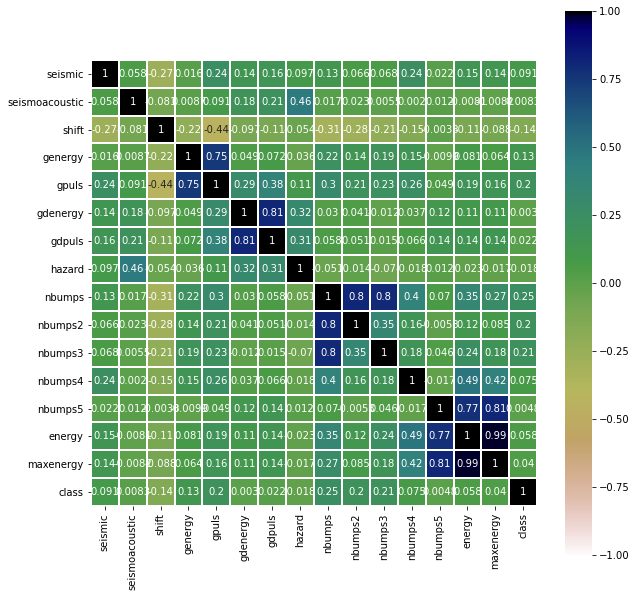

In [37]:
dfcorrelazione = df.corr()
plt.figure(figsize=[10, 10])
sns.heatmap(data=dfcorrelazione, vmin=-1, vmax=1, cmap='gist_earth_r', annot=True, square=True, linewidths=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

In [38]:
df['class'].corr(df['seismic'])

0.09057373364376718

In [39]:
df['class'].corr(df['seismoacoustic'])

0.008250817280129176

In [40]:
df['class'].corr(df['shift'])

-0.1420794671408067

In [41]:
df['class'].corr(df['genergy'])

0.12815955900330117

In [42]:
df['class'].corr(df['gpuls'])

0.2010417004640276

In [43]:
df['class'].corr(df['gdenergy'])

0.0029570195860891364

In [44]:
df['class'].corr(df['gdpuls'])

0.021788111543805055

In [45]:
df['class'].corr(df['hazard'])

-0.01774377796242619

In [46]:
df['class'].corr(df['nbumps'])

0.24814357064484222

In [47]:
df['class'].corr(df['nbumps2'])

0.20138096880179931

In [48]:
df['class'].corr(df['nbumps3'])

0.20532703909347647

In [49]:
df['class'].corr(df['nbumps4'])

0.07545800823481602

In [50]:
df['class'].corr(df['nbumps5'])

0.004833700091654036

In [51]:
df['class'].corr(df['energy'])

0.05843085986597412

In [52]:
df['class'].corr(df['maxenergy'])

0.040243497797985084

### trasformazioni logaritmiche